## 1. Data Source and Contents

The dataset is obtained from the Census Bureau and represents salaries of people along with seven demographic variables. The following is a description of our dataset:

* **Number of target classes:** 2 ('>50K' and '<=50K') [ Labels: 1, 0 ]
* **Number of attributes (Columns):** 7
* **Number of instances (Rows):** 48,842

In [ ]:
# importing packages
!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading the data
census_data = pd.read_csv('/content/drive/MyDrive/MSBA_Colab_2020/ML_Algorithms/CA04/Data/census_data.csv')

In [ ]:
# checking out the dataset
census_data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


## 2. Finding Optimal Value of a Key Hyper-parameter
For Ensemble Models, one of the key hyper-parameter is number of “estimators”. The following is an example of finding the optimal value of “Maximum Depth”. Review the following code snippet to understand how the optimal value of this hyper-parameter (Max Depth = 10) is found by plotting a graph.

In [ ]:
# encoding categorical values
census_data_encoded = census_data.apply(LabelEncoder().fit_transform)
census_data_encoded.dtypes

# flag: train = 1, test = 0

# seperating dataset into training (67%) and testing (33%) data
X_train = census_data_encoded[census_data_encoded.flag==1].drop(['flag','y'], axis=1)
X_test = census_data_encoded[census_data_encoded.flag==0].drop(['flag','y'], axis=1).reset_index(drop=True)

y_train = census_data_encoded[census_data_encoded.flag==1][['y']]
y_test = census_data_encoded[census_data_encoded.flag==0][['y']].reset_index(drop=True)

# verifying shapes (split ratio)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(16281, 1)

In [ ]:
# verifying that all categorical data has been transformed into numerical data
census_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   hours_per_week_bin  48842 non-null  int64
 1   occupation_bin      48842 non-null  int64
 2   msr_bin             48842 non-null  int64
 3   capital_gl_bin      48842 non-null  int64
 4   race_sex_bin        48842 non-null  int64
 5   education_num_bin   48842 non-null  int64
 6   education_bin       48842 non-null  int64
 7   workclass_bin       48842 non-null  int64
 8   age_bin             48842 non-null  int64
 9   flag                48842 non-null  int64
 10  y                   48842 non-null  int64
dtypes: int64(11)
memory usage: 4.1 MB


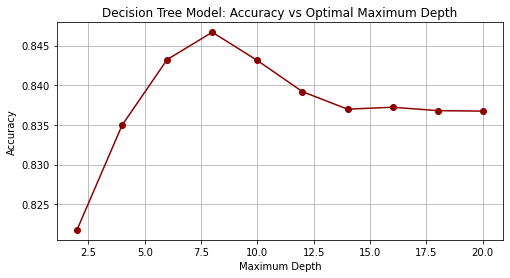

In [ ]:
# calculating accuracy score for each maximum depth value to find optimal max_depth

results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20] # different options for maximum tree depths 

for trees in max_depth_options: # iterates through every maximum depth value
  model = DecisionTreeClassifier(max_depth=trees, random_state=101) # creates Decision Tree model for each maximum depth value 
  model.fit(X_train, y_train) # fits model with training data defined above
  y_pred = model.predict(X_test)  # predicting outcomes (y) using outcome features of test data
  accuracy = accuracy_score(y_test, y_pred) # calculating accuracy score of prediction (used in palce of np.mean)
  results.append(accuracy)  # appends accuracy scores to empty results list 


#plotting result

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred', marker='o')
plt.title('Decision Tree Model: Accuracy vs Optimal Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

## 3. Building a Random Forest Model
Using Notebook, and the same data source from CA03, train a Random Forest Model. Using similar approach of Section 2 above, plot a graph of Accuracy vs. n_estimator. Use n_estimator values as [50,100,150,200,250,300,350,400,450,500].

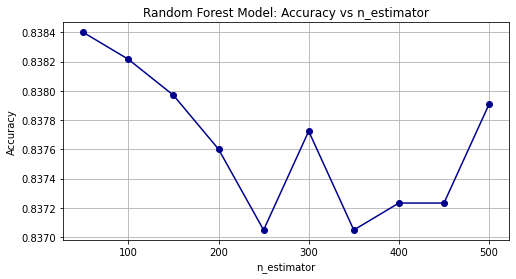

In [ ]:
# calculating accuracy score for each n_estimator value to find optimal n_estimator

n_estimator_options = [50,100,150,200,250,300,350,400,450,500] # n_estimator values
results = []

for trees in n_estimator_options:  # iterates through list of n_values
  model = RandomForestClassifier(n_estimators=trees, max_features='auto', random_state=101) # applies Random Forest model to each n_estimator value. Changing shape of y to match n_samples using .ravel()
  model.fit(X_train, y_train.values.ravel()) # fits model using train and test data defined above. 
  y_pred = model.predict(X_test)  # predicting outcomes (y) using outcome features of test data
  accuracy = accuracy_score(y_test, y_pred) # calculating accuracy score of prediction
  results.append(accuracy)  # appends accuracy score of each n_estimator value to results list


# plotting result

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_options).plot(color='darkblue', marker = 'o')
plt.title('Random Forest Model: Accuracy vs n_estimator')
plt.xlabel('n_estimator')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Answer the following question:
1. **Write your observations about the Classifier’s behavior with respect to the
number of estimators**

> The plot returns a polynomial trendline. The accuracy score of the predictions gradually decreases when the n_estimator ranges between 50 and 250 trees. At 300 trees, the accuracy increases again before decreasing at 350. After, it gradually increases again until it reaches 500 trees. Thus, the model that uses the lowest n_estimator value produces the optimal results in terms of accuracy.




2. **Is there an optimal value of the estimator within the given range?**

> The optimal value of the estimator is 50 trees, which results in the highest accuracy score of 0.8384.

## 4. AdaBoost Model
Using a similar process as in Section 3, build an AdaBoost Model and plot a graph of Accuracy vs n_estimator.

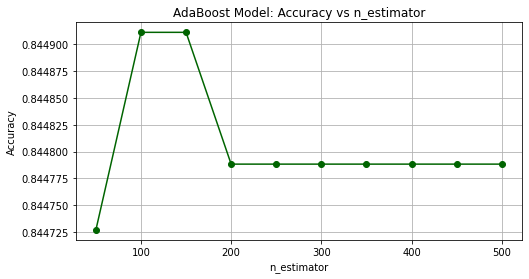

In [ ]:
# calculating accuracy score for each n_estimator value to find optimal n_estimator

n_estimator_options = [50,100,150,200,250,300,350,400,450,500] # n_estimator values
results = []

for trees in n_estimator_options:  # iterates through list of n_values
  model = AdaBoostClassifier(n_estimators=trees, random_state=101) # applies AdaBoost model to each n_estimator value. Changing shape of y to match n_samples using .ravel()
  model.fit(X_train, y_train.values.ravel()) # fits model using train and test data defined above. 
  y_pred = model.predict(X_test)  # predicting outcomes (y) using outcome features of test data
  accuracy = accuracy_score(y_test, y_pred) # calculating accuracy score of prediction
  results.append(accuracy)  # appends accuracy score of each n_estimator value to results list


# plotting result

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_options).plot(color='darkgreen', marker = 'o')
plt.title('AdaBoost Model: Accuracy vs n_estimator')
plt.xlabel('n_estimator')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

1. **Write your observations about the Classifier’s behavior with respect to the
number of estimators**

> The accuracy score starts at a low with 50 trees, but then peaks with 100-150 trees. It decreases again once it reaches 200, and stays constant until 500 trees. To obtain the optimal results, a relatively low n_estimator value should be used. Note that there is an improvement in the overall accuracy scores compared to the Random Forest Model.

2. **Is there an optimal value of the estimator within the given range?**

> The optimal value of the estimator is 100-150 trees, which results in the highest accuracy scores of 0.844915.

## 4. Gradient Boost Model (classifier)
Using a similar process as in Section 3, build an Gradient Boost Model and plot a graph of Accuracy vs n_estimator.

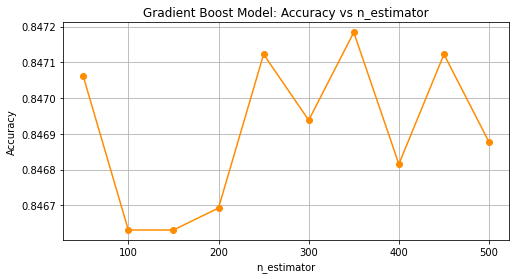

In [ ]:
# calculating accuracy score for each n_estimator value to find optimal n_estimator

n_estimator_options = [50,100,150,200,250,300,350,400,450,500] # n_estimator values
results = []

for trees in n_estimator_options:  # iterates through list of n_values
  model = GradientBoostingClassifier(n_estimators=trees, random_state=101) # applies Gradient Boost model to each n_estimator value. Changing shape of y to match n_samples using .ravel()
  model.fit(X_train, y_train.values.ravel()) # fits model using train and test data defined above. 
  y_pred = model.predict(X_test)  # predicting outcomes (y) using outcome features of test data
  accuracy = accuracy_score(y_test, y_pred) # calculating accuracy score of prediction
  results.append(accuracy)  # appends accuracy score of each n_estimator value to results list


# plotting result

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_options).plot(color='darkorange', marker = 'o')
plt.title('Gradient Boost Model: Accuracy vs n_estimator')
plt.xlabel('n_estimator')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

1. **Write your observations about the Classifier’s behavior with respect to the
number of estimators**

> The graph returned a polynomial trendline. With 50 trees, the accuracy score is relatively high but then decreases within the 100-200 tree range. In the range of 250-500 trees, the trendline fluctuates heaviliy but reaches peak accuracy at 350 trees. Thus, a medium-high n_estimator value should be used to obtain optimal results. Note that the accuracy score using the Gradient Boost model is higher than that using the AdaBoost or Random Forest model.

2. **Is there an optimal value of the estimator within the given range?**

> The optimal value of the estimator is 350 trees, which results in the highest accuracy scores of 0.8472.

## 4. XGBoost Model
Using a similar process as in Section 3, build an Gradient Boost Model and plot a graph of Accuracy vs n_estimator.



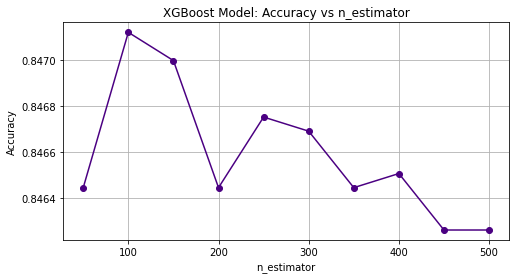

In [ ]:
# calculating accuracy score for each n_estimator value to find optimal n_estimator

n_estimator_options = [50,100,150,200,250,300,350,400,450,500] # n_estimator values
results = []

for trees in n_estimator_options:  # iterates through list of n_values
  model = XGBClassifier(n_estimators=trees, random_state=101) # applies XGBoost Model to each n_estimator value. Changing shape of y to match n_samples using .ravel()
  model.fit(X_train, y_train.values.ravel()) # fits model using train and test data defined above. 
  y_pred = model.predict(X_test)  # predicting outcomes (y) using outcome features of test data
  accuracy = accuracy_score(y_test, y_pred) # calculating accuracy score of prediction
  results.append(accuracy)  # appends accuracy score of each n_estimator value to results list


# plotting result

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_options).plot(color='indigo', marker = 'o')
plt.title('XGBoost Model: Accuracy vs n_estimator')
plt.xlabel('n_estimator')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

1. **Write your observations about the Classifier’s behavior with respect to thenumber of estimators**

> The graph returned a trendline that follows a non-linear downward trend. It returns the highest accuracy score at 100 trees. Despite there are small increases in accuracy, it gradually decreases until it reaches 500 trees. 
Thus, a relatively low n_estimator value should be used to obtain optimal results. The range of accuracy scores is comparable to those when using the Gradient Boost Model.

2. **Is there an optimal value of the estimator within the given range?**

> The optimal value of the estimator is 100 trees, which results in the highest accuracy scores of about 0.84715.

## 5. Compare Performance
Keep all common Hyper-parameters same for four models (Random Forest, AdaBoost, Gradient Boost, XGB), run them again and create a performance comparison table within your.
Also, print the values of all COMMON Hyper-parameters below this table (from code)

In [ ]:
# re-calculating accuracy score with n_estimator = 250
n_value = 250
accuracy_results = []

# calculating values and appending results to list

# random forest
model_rf = RandomForestClassifier(n_estimators=n_value, max_features='auto', random_state=101)
model_rf.fit(X_train, y_train.values.ravel())
y_pred_rf = model_rf.predict(X_test)
accuracy_results.append(accuracy_score(y_test, y_pred_rf))

# ada boost
model_ada = AdaBoostClassifier(n_estimators=n_value, random_state=101)
model_ada.fit(X_train, y_train.values.ravel())
y_pred_ada = model_ada.predict(X_test)
accuracy_results.append(accuracy_score(y_test, y_pred_ada))

# gradient boost
model_gb = GradientBoostingClassifier(n_estimators=n_value, random_state=101)
model_gb.fit(X_train, y_train.values.ravel())
y_pred_gb = model_gb.predict(X_test)
accuracy_results.append(accuracy_score(y_test, y_pred_gb))

# XGB
model_xgb = XGBClassifier(n_estimators=n_value, random_state=101)
model_xgb.fit(X_train, y_train.values.ravel())
y_pred_xgb = model_xgb.predict(X_test)
accuracy_results.append(accuracy_score(y_test, y_pred_xgb))

accuracy_results

[0.8370493212947607, 0.8447884036607088, 0.847122412628217, 0.8467538848965052]

In [ ]:
# calculating AUC score with n_estimator = 250
auc_results = []

# calculating values and appending results to list
auc_results.append(roc_auc_score(y_test, y_pred_rf))
auc_results.append(roc_auc_score(y_test, y_pred_ada))
auc_results.append(roc_auc_score(y_test, y_pred_gb))
auc_results.append(roc_auc_score(y_test, y_pred_xgb))

auc_results

[0.7450719090283514,
 0.7460076328264228,
 0.7598376456168019,
 0.7597759833191879]

In [ ]:
results = []
results.append([accuracy_results, auc_results])

# creating empty table
performance = pd.DataFrame(index=['Accuracy','AUC'],columns=['Random Forst','AdaBoost','Gradient Boost','XGB'])
performance.loc['Accuracy'] = accuracy_results
performance.loc['AUC'] = auc_results

# find common parameters
rf_hp = model_rf.get_params()
ada_hp = model_ada.get_params()
gb_hp = model_gb.get_params()
xgb_hp = model_xgb.get_params()

common_hp = rf_hp.keys() & ada_hp.keys() & gb_hp.keys() & xgb_hp.keys()

display(performance)

print('\nThe common hyperparameters are ', common_hp)

,Random Forst,AdaBoost,Gradient Boost,XGB
Accuracy,0.837049,0.844788,0.847122,0.846754
AUC,0.745072,0.746008,0.759838,0.759776



The common hyperparameters are  {'random_state', 'n_estimators'}
